In [91]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [7]:
data = 'dataset/cars_dataset.csv'

df = pd.read_csv(data)

In [8]:
df.shape

(12076, 11)

In [9]:
df.head()

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE,Price
0,2011,chevrolet,camaro,Excellent,Automatic,6,gas,12200,Avg CC,6,0
1,2012,chrysler,town & country,Excellent,Manual,6,gas,111000,Low CC,11,0
2,2009,jeep,liberty,Excellent,Manual,6,gas,68650,Low CC,49,0
3,2011,buick,lacrosse,Excellent,Manual,6,gas,123562,High CC,40,0
4,2008,chevrolet,cobalt,Excellent,Automatic,4,gas,138001,Avg CC,33,0


In [16]:
colNames = []
for col in df.columns:
    colNames.append(col)

print(colNames)

['YEAR', 'MAKE', 'MODEL', 'CONDITION', 'TRANSMISSION', 'CYLINDERS', 'FUEL', 'ODOMETER', 'ENGINE POWER', 'MILAGE', 'Price']


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12076 entries, 0 to 12075
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YEAR          12076 non-null  int64 
 1   MAKE          12076 non-null  object
 2   MODEL         12076 non-null  object
 3   CONDITION     12076 non-null  object
 4   TRANSMISSION  12076 non-null  object
 5   CYLINDERS     12076 non-null  int64 
 6   FUEL          12076 non-null  object
 7   ODOMETER      12076 non-null  int64 
 8   ENGINE POWER  12076 non-null  object
 9   MILAGE        12076 non-null  int64 
 10  Price         12076 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.0+ MB


In [19]:
for col in colNames:
    print(df[col].value_counts())

2015    1237
2016    1175
2014     935
2013     844
2012     826
        ... 
1952       1
1940       1
1951       1
1944       1
1962       1
Name: YEAR, Length: 89, dtype: int64
ford               2792
chevrolet          2143
ram                1003
toyota              791
gmc                 713
jeep                520
nissan              441
dodge               429
honda               414
bmw                 269
mercedes-benz       245
volkswagen          217
cadillac            208
subaru              206
hyundai             174
chrysler            166
buick               156
lexus               127
audi                122
mazda               120
kia                 113
lincoln              91
pontiac              90
volvo                90
infiniti             82
acura                71
rover                57
mitsubishi           48
jaguar               45
mercury              41
mini                 32
saturn               29
fiat                  9
ferrari               9
dats

In [20]:
df.isnull().sum()

YEAR            0
MAKE            0
MODEL           0
CONDITION       0
TRANSMISSION    0
CYLINDERS       0
FUEL            0
ODOMETER        0
ENGINE POWER    0
MILAGE          0
Price           0
dtype: int64

In [45]:
X = df.drop(['MODEL', 'YEAR', 'ODOMETER', 'Price'], axis = 1)

y = df.Price

In [46]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [47]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((9057, 7), (3019, 7))

In [48]:
# check data types in X_train

X_train.dtypes

MAKE            object
CONDITION       object
TRANSMISSION    object
CYLINDERS        int64
FUEL            object
ENGINE POWER    object
MILAGE           int64
dtype: object

In [49]:
# import category encoders

import category_encoders as ce

In [51]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['MAKE', 'CONDITION', 'TRANSMISSION', 'CYLINDERS', 'FUEL', 'ENGINE POWER', 'MILAGE'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [52]:
X_train.head()

,MAKE,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ENGINE POWER,MILAGE
9611,1,1,1,1,1,1,1
1339,2,1,2,2,2,2,2
9460,1,1,1,1,1,1,3
738,2,1,1,3,2,1,4
965,3,1,1,1,2,1,5


In [53]:
X_test.head()

,MAKE,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ENGINE POWER,MILAGE
8903,2.0,1,2,3,1,1,37
9678,2.0,1,1,1,2,1,34
2901,5.0,1,1,1,2,2,28
11898,2.0,1,2,3,1,1,33
8349,4.0,1,1,3,2,1,34


In [54]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7261


In [55]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7261


In [56]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [58]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)

MILAGE          0.357085
MAKE            0.244290
ENGINE POWER    0.164295
CYLINDERS       0.126779
FUEL            0.077289
CONDITION       0.016313
TRANSMISSION    0.013950
dtype: float64


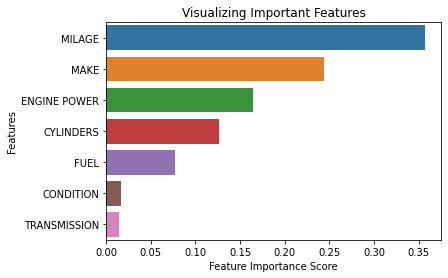

In [59]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

### Rebuild Random Forest Model with Selected Features

In [83]:
X = df.drop(['MODEL', 'YEAR', 'ODOMETER', 'Price', 'CONDITION', 'TRANSMISSION'], axis = 1)

y = df.Price

In [86]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [87]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['MAKE', 'CYLINDERS', 'FUEL', 'ENGINE POWER', 'MILAGE'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [88]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('New model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

New model accuracy score : 0.7307


Confusion matrix

 [[1379  398   14]
 [ 338  823   11]
 [  15   37    4]]


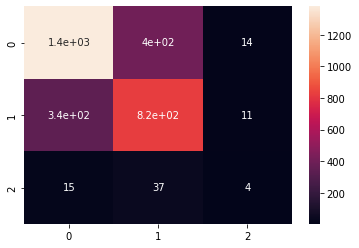

In [89]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True)
print('Confusion matrix\n\n', cm)

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1791
           1       0.65      0.70      0.68      1172
           2       0.14      0.07      0.09        56

    accuracy                           0.73      3019
   macro avg       0.53      0.51      0.52      3019
weighted avg       0.73      0.73      0.73      3019



### Kesimpulan

1. Pada project ini, dibangun model klasifikasi menggunakan Random Forest dengan 10 decision-tree dan 100 decision-tree, namun akurasi untuk keduanya masih cukup rendah, yaitu kurang dari 75%
2. Setelah diketahui tingkat 'kepentingan' fitur atau imporntance features, model dibangun ulang dengan menghilangkan fitur yang kurang penting
3. Namun, setelah dibangun kembali, model masih memiliki tingkat akurasi kurang dari 75%